## Final Project: Linear Regression

- We want to present the relationship between (two) variables linearly

- For example, recall the running distance and drinking water 

- We are interested to obtain the best line describing by `y_pred[i] = w_1 x[i] +w_0` that maps running distance to drinking water

- Below, list `x` represents running distance in miles and list `y` represents the drinking water in litres 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

Text(0, 0.5, 'Water Drinks (Litre)')

## In order to obtain the best line, we should define error first

- For linear relationship, mean-square-error (MSE) represents is it a good line (good model) or not 

- $y[i]$ and $y_{pred}[i]$ are i-th element of list `y` and list `y_pred` respectively where `y_pred[i] = w_1 x[i] +w_0`

- Define error as: $E[i] = y_{pred}[i] - y[i]$

- Define mean-square-error as: $MSE = \frac{1}{N} \sum_{i=0}^{N-1} E[i]^2$

- Also mean-square-error is equal to: $MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$ 

- The parameter $N$ is: $N = len(y)$

### Question 1: Obtain the MSE for the following two lines:

1- `y_pred[i] = 0.7*x[i] + 0.3`

2- `y_pred[i] = 0.25163494*x[i] + 0.79880123`

Hint: Your function take four input arguments: 1- y, 2- x, 3- slope, 4-intercept

In [3]:
def min_sq_error(y, x, w1, w0):
    y_pred = (w1*x)+w0
    sum_squared_error = sum((y_pred-y)**2)
    N = len(y)
    mse = sum_squared_error/N
    return mse

print(min_sq_error(y, x, 0.7, 0.3))
print(min_sq_error(y, x, 0.25163494, 0.79880123))

6.518593101764703
0.15385767404191164


## Question 2: Obtain the best line (Coding is not required)

- In order the best line, we want to obtain which slope ($w_1$) and intercept ($w_0$) minimize the mean-square-error (MSE)

- Mathematically:

    - $MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$ 

    - $MSE = f(w_1, w_0)= \frac{1}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$ 

The steps in order to obtain the best line: 

1- Compute: 

$\frac{\partial MSE}{\partial w_1}$ 

and

$\frac{\partial MSE}{\partial w_0}$

2- then obtain $w_1$ and $w_0$ such that:


$\frac{\partial MSE}{\partial w_1} = 0$ 

and

$\frac{\partial MSE}{\partial w_0} = 0$

- For this part, you need to use partial derivative and you use derivative table

- For this part, write down the steps and the solution on a paper 

## Question 3: Write a code to return the slope and intercept with given list x and y

- After taking partial derivative of mean-squared-error and setting to zero for both $w_1$ and $w_0$ ($\frac{\partial MSE}{\partial w_1} = 0$ $\frac{\partial MSE}{\partial w_0} = 0$)

- $w_1$ = is obtained from list x and list y
- $w_0 $ = is obtained from $w_1$, list x and list y
- Write a Python function that return $w_1$ and $w_0$ from your calculation on the paper 

In [4]:
def slope_intercept_LR(x, y):
    w1 = (np.mean(x*y)-(np.mean(x)*np.mean(y)))/(np.mean(x**2)-(np.mean(x))**2)
    w0 = np.mean(y)-(np.mean(x)*((np.mean(x*y)-(np.mean(x)*np.mean(y)))/(np.mean(x**2)-(np.mean(x))**2)))
    return w1, w0

print(slope_intercept_LR(x, y))

(0.25163494428355315, 0.7988012261753947)


## Question 4: After obtain the best line, obtain the variance and mean of error

- In Question 3, we have obtained the best line
- So, we can error list which its element is: $E[i] = y_{pred}[i] - y[i]$
- Write a function that calculate variance and mean of list $E$
- Plot the distribution of the error for optimal line

In [10]:
def y_pred_list(w1,w0):
    return (w1*x)+w0

def mean_of_LR(x, y):
    w1, w0 = slope_intercept_LR(x, y)
    y_pred = y_pred_list(w1,w0)
    return(sum(y_pred)/len(y_pred))

def var_of_LR(x,y):
    w1, w0 = slope_intercept_LR(x, y)
    mean = mean_of_LR(x,y)
    y_pred = y_pred_list(w1,w0)
    variance = np.mean((y_pred-mean)**2)
    return variance

def _error(y_pred, y):
    return [y1 - y0 for y1, y0 in zip(y_pred, y)]

print('The calculated mean is: ', mean_of_LR(x,y))
print('The calculated variance is: ', var_of_LR(x,y))
print()

w1, w0 = slope_intercept_LR(x, y)
y_pred = (w1*x)+w0
given_mean = np.mean(y_pred)
given_var = np.var(y_pred)
print('The given mean is: ', given_mean)
print('The given variance is: ', given_var)

The calculated mean is:  2.366235294117647
The calculated variance is:  0.3471050941241765

The given mean is:  2.366235294117647
The given variance is:  0.3471050941241765


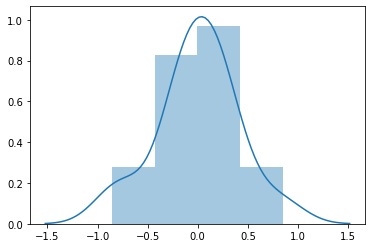

In [12]:
import seaborn as sns

w1, w0 = slope_intercept_LR(x, y)
error = _error(y_pred_list(w1, w0), y)
sns.distplot(error, hist=True, kde=True, bins=4)

## Question 5: (Optional but Bonus point) In almost all applications, we update the slope and intercept through iteration

- Instead of putting the $\frac{\partial MSE}{\partial w_1} = 0$ $\frac{\partial MSE}{\partial w_0} = 0$
    - Initialize the $w_1$ and $w_0$ with arbitrary value, then update them by following Gradient Updating Rule:
    - $w_1 = w_1 - step*\frac{\partial MSE}{\partial w_1}$
    - $w_0 = w_0 - step*\frac{\partial MSE}{\partial w_0}$

In [7]:
import numpy as np

w_0 = np.random.randn()
w_1 = np.random.randn()
step = 0.01
epoch = 5000
for _ in range(epoch):
    w_1 = w_1 - step*(w_1*np.mean([i**2 for i in x]) +w_0*np.mean(x)-np.mean([a*b for a,b in zip(x,y)]))
    w_0 = w_0 - step*(w_1*np.mean(x)-np.mean(y)+w_0)
print(w_1)
print(w_0)

0.2518472021724522
0.7972964492220543


In [8]:
from scipy import stats

print(stats.linregress(x, y))

LinregressResult(slope=0.25163494428355404, intercept=0.7988012261753894, rvalue=0.8323917528894436, pvalue=3.391952640710616e-05, stderr=0.0432568020417479)
